# Business Understanding

Het jaarlijkse energieverbruik door Nederlanders blijft maar toenemen, ondanks alle bezuinigende maatregelen die we treffen als volk. Het toenemende energiegebruik is mede verantwoordelijk voor de wereldwijde klimaatveranderingen. De gemiddelde temperatuur over de afgelopen eeuw is gestegen, de hoeveelheid en intensiteit van neerslag zijn toegenomen en zeer warme dagen komen steeds vaker voor. Het realiseren van de klimaatdoelen van Parijs is nodig om verdere opwarming van de aarde en de gevolgen daarvan zo veel mogelijk te voorkomen. Om aan de afspraken van Parijs te voldoen moet Nederland overstappen van fossiele brandstoffen op duurzame energiebronnen zoals zon en wind. Het is daarom belangrijker dan ooit om na te denken over nieuwe manieren van energie opwekken en het indammen van energieverspilling. 

Enexis, Liander en Stedin zijn de drie grote netwerkbeheerders van Nederland en leveren samen energie aan bijna het hele land. Elk jaar publiceren deze bedrijven een tabel met het energieverbruik van de gebieden die onder hun beheer vallen, op hun websites. 
Welke inzichten kunnen uit deze Nederlandse verbruiksdata gegenereerd worden? En hoe kunnen we deze inzichten toepassen om een bijdrage te kunnen leveren aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling? 

Het doel van deze challenge is om inzichten te creëren die wellicht kunnen bijdragen aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling. Om niet verdwaald te raken in alle mogelijkheden die deze datasets bieden, zijn er van te voren een aantal hoofdvragen opgesteld. Deze hoofdvragen kunnen later nog worden opgesplitst in deelvragen.
Als we kijken naar de data die beschikbaar is, kunnen we een aantal vragen bedenken die wellicht met behulp van data science kunnen worden opgelost. Deze vragen zijn als volgt:
- Welke regio’s zijn de grootgebruikers van het land en waar ligt dit aan?
- Kunnen we het gas- en/of energieverbruik van het/de aankomende jaar/jaren voorspellen en zo ja, wat vertelt deze voorspelling ons?
- Kunnen we achterhalen wat voor type gebruiker (bijv. een winkel of huis) de meeste energie verspilt en zo ja, hier een oplossing voor bedenken?


# Data Understanding

In [4]:
import pandas as pd
import glob
gasPath = 'datasets\Gas'
elecPath = 'datasets\Electricity'

## Stedin Gas

In [3]:
stedin_gas = glob.glob(gasPath + "/stedin_*.csv")
li = []  #waarom variabele li? (naarmate ik hier langer mee bezig was bedacht ik me dat het mogelijk voor list staat?)

for filename in stedin_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedinFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedinFrame.info())
print(stedinFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934948 entries, 0 to 934947
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   934948 non-null  int64  
 1   purchase_area                 934947 non-null  object 
 2   street                        934948 non-null  object 
 3   zipcode_from                  934948 non-null  object 
 4   zipcode_to                    934948 non-null  object 
 5   city                          934948 non-null  object 
 6   num_connections               934948 non-null  int64  
 7   delivery_perc                 934948 non-null  float64
 8   perc_of_active_connections    934948 non-null  float64
 9   type_conn_perc                934948 non-null  float64
 10  type_of_connection            934948 non-null  object 
 11  annual_consume                934948 non-null  int64  
 12  annual_consume_lowtarif_perc  934948 non-nul

## Stedin Elektriciteit

In [5]:
stedin_elec = glob.glob(elecPath + "/stedin_*.csv")
li = []

for filename in stedin_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedin_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedin_Elec_Frame.info())
print(stedin_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913096 entries, 0 to 913095
Data columns (total 15 columns):
net_manager                     913096 non-null int64
purchase_area                   913096 non-null object
street                          913096 non-null object
zipcode_from                    913096 non-null object
zipcode_to                      913096 non-null object
city                            913096 non-null object
num_connections                 913096 non-null int64
delivery_perc                   913096 non-null float64
perc_of_active_connections      913096 non-null float64
type_conn_perc                  913096 non-null float64
type_of_connection              913096 non-null object
annual_consume                  913096 non-null int64
annual_consume_lowtarif_perc    913096 non-null float64
smartmeter_perc                 913096 non-null float64
year                            913096 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 104.5+ M

## Liander Gas

In [4]:
liander_gas = glob.glob(gasPath + "/liander_*.csv") 

li = []

for filename in liander_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

lianderFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(lianderFrame.info())
print(lianderFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200607 entries, 0 to 1200606
Data columns (total 15 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   net_manager                   1200607 non-null  object 
 1   purchase_area                 964673 non-null   object 
 2   street                        1200607 non-null  object 
 3   zipcode_from                  1200607 non-null  object 
 4   zipcode_to                    1200607 non-null  object 
 5   city                          1200607 non-null  object 
 6   num_connections               1200607 non-null  float64
 7   delivery_perc                 1200607 non-null  float64
 8   perc_of_active_connections    1200607 non-null  float64
 9   type_conn_perc                1200607 non-null  float64
 10  type_of_connection            1200607 non-null  object 
 11  annual_consume                1200607 non-null  float64
 12  annual_consume_lowtarif_perc

## Liander Elektriciteit

In [7]:
liander_elec = glob.glob(elecPath + "/liander_*.csv")
li = []

for filename in liander_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

liander_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(liander_Elec_Frame.info())
print(liander_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511295 entries, 0 to 1511294
Data columns (total 15 columns):
net_manager                     1511295 non-null object
purchase_area                   624638 non-null object
street                          1511295 non-null object
zipcode_from                    1511295 non-null object
zipcode_to                      1511295 non-null object
city                            1511295 non-null object
num_connections                 1511295 non-null float64
delivery_perc                   1511295 non-null float64
perc_of_active_connections      1511295 non-null float64
type_conn_perc                  1511295 non-null float64
type_of_connection              1511295 non-null object
annual_consume                  1511295 non-null float64
annual_consume_lowtarif_perc    1511295 non-null float64
smartmeter_perc                 1511295 non-null float64
year                            1511295 non-null object
dtypes: float64(7), object(8)
memory usag

## Enexis Gas

In [5]:
enexis_gas = glob.glob(gasPath + "/enexis_*.csv")
li = []

for filename in enexis_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexisFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexisFrame.info())
print(enexisFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950202 entries, 0 to 950201
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   net_manager                   950202 non-null  object 
 1   purchase_area                 950202 non-null  object 
 2   street                        950202 non-null  object 
 3   zipcode_from                  950202 non-null  object 
 4   zipcode_to                    950202 non-null  object 
 5   city                          950202 non-null  object 
 6   delivery_perc                 950202 non-null  float64
 7   num_connections               950202 non-null  int64  
 8   perc_of_active_connections    950202 non-null  int64  
 9   type_conn_perc                867236 non-null  float64
 10  type_of_connection            867236 non-null  object 
 11  annual_consume                950202 non-null  float64
 12  annual_consume_lowtarif_perc  950202 non-nul

## Enexis Elektriciteit

In [8]:
enexis_elec = glob.glob(elecPath + "/enexis_*.csv")
li = []

for filename in enexis_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexis_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexis_Elec_Frame.info())
print(enexis_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141402 entries, 0 to 1141401
Data columns (total 15 columns):
net_manager                     1141402 non-null object
purchase_area                   1141402 non-null object
street                          1141402 non-null object
zipcode_from                    1141402 non-null object
zipcode_to                      1141402 non-null object
city                            1141402 non-null object
delivery_perc                   1140820 non-null float64
num_connections                 1141402 non-null int64
perc_of_active_connections      1141402 non-null int64
type_conn_perc                  1033890 non-null float64
type_of_connection              1033821 non-null object
annual_consume                  1141402 non-null float64
annual_consume_lowtarif_perc    1141402 non-null float64
smartmeter_perc                 1141402 non-null float64
year                            1141402 non-null object
dtypes: float64(5), int64(2), object(8)
memo

# Data Preparation

### Gas

In [6]:
dataFrame = pd.concat([stedinFrame, lianderFrame, enexisFrame], sort=True)

print(dataFrame.info())
print(dataFrame.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3085757 entries, 0 to 950201
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   annual_consume                float64
 1   annual_consume_lowtarif_perc  float64
 2   city                          object 
 3   delivery_perc                 float64
 4   net_manager                   object 
 5   num_connections               float64
 6   perc_of_active_connections    float64
 7   purchase_area                 object 
 8   smartmeter_perc               float64
 9   street                        object 
 10  type_conn_perc                float64
 11  type_of_connection            object 
 12  year                          object 
 13  zipcode_from                  object 
 14  zipcode_to                    object 
dtypes: float64(7), object(8)
memory usage: 376.7+ MB
None
   annual_consume  annual_consume_lowtarif_perc          city  delivery_perc  \
0          2611.0 

### Elektriciteit

In [17]:
elecFrame = pd.concat([stedin_Elec_Frame.drop(0), liander_Elec_Frame.drop(0), enexis_Elec_Frame.drop(0)], sort=False) 
# zonder drop blijven de indexes van de originele dataframes er in staan, dit resulteert er in dat er 3 dataframes met index 0 voorkomen

print(elecFrame.info())
elecFrame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565790 entries, 1 to 1141401
Data columns (total 15 columns):
net_manager                     object
purchase_area                   object
street                          object
zipcode_from                    object
zipcode_to                      object
city                            object
num_connections                 float64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection              object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                            object
dtypes: float64(7), object(8)
memory usage: 435.3+ MB
None


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17.0,100.0,100.0,41.0,1x25,3467.0,76.47,0.00,2009
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17.0,100.0,100.0,41.0,3x25,3880.0,64.71,0.00,2009
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20.0,100.0,100.0,45.0,1x25,4699.0,85.00,0.00,2009
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17.0,100.0,100.0,71.0,1x25,4039.0,64.71,0.00,2009
5,8716874000009,Stedin Utrecht,Paulus Potterlaan,1231AH,1231AH,LOOSDRECHT,22.0,100.0,100.0,41.0,3x25,3991.0,86.36,4.55,2009


# Modeling

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

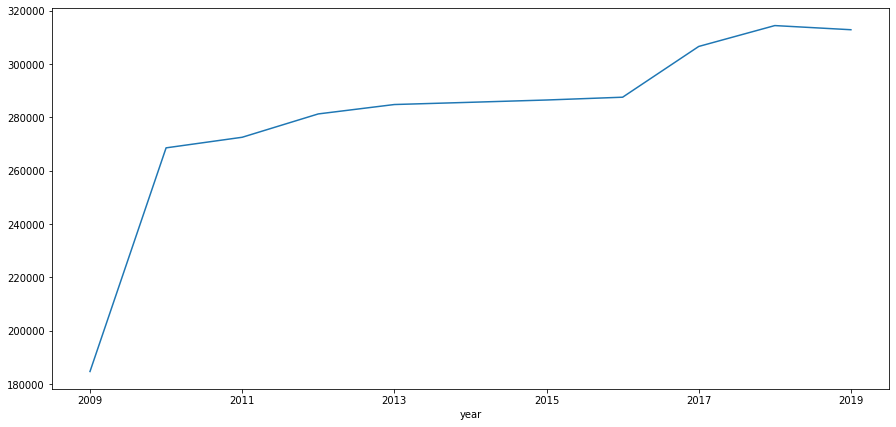

In [14]:

fig, ax = plt.subplots(figsize=(15,7))
annualConsume = dataFrame.groupby('year').count()['annual_consume'].plot(ax=ax)
plt.show()



         annual use  # households  average use
2009   97783.836200        214167  4565.775129
2010  151664.251100        323139  4693.467861
2011  152521.313000        325219  4689.803271
2012  154323.431200        327989  4705.140453
2013  154687.333100        331975  4659.607895
2014  153084.688300        332385  4605.643705
2015  148446.935000        333615  4449.648097
2016  146126.587400        335007  4361.896539
2017  145989.905900        341250  4278.092481
2018  150845.282884        351123  4296.080943
2019  146564.089577        349921  4188.490819


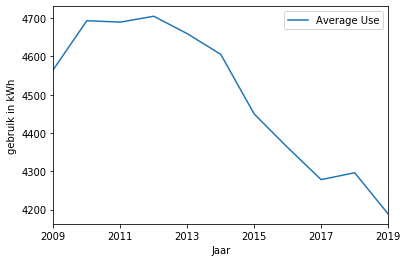

In [63]:
#fig, ax = plt.subplots(figsize=(15,7))
#annual_Consume_Elec = elecFrame.groupby('year').count()['annual_consume'].plot(ax=ax)
#plt.show()


#elecFrame["annual_consume"].sum(axis=0).where(elecFrame["year"] == "2010", 0)
#df['total'] = elecFrame.loc[elecFrame['year'] == 2010,['annual_consume']].sum(axis=0)

years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

cons_year = []
households_year = []
avg_cons = []
for i in years:
    sum_ann = elecFrame["annual_consume"].where(elecFrame['year'] == i).sum()
    sum_ann_div = sum_ann/10000
    households = elecFrame["year"].where(elecFrame["year"] == i).count()
    avg = sum_ann/households
    cons_year.append(sum_ann_div)
    households_year.append(households)
    avg_cons.append(avg)


data = zip(cons_year, households_year, avg_cons)
annual_use = pd.DataFrame(list(data), index = years, columns = ["annual use", "# households", "average use"])
#annual_use_electricity = pd.DataFrame(cons_year, index = years, columns = ["annual use"])
print(annual_use)
#annual_use.plot()
avg_use = pd.DataFrame(avg_cons, index = years, columns = ["Average Use"])
avg_use_plot = avg_use.plot()
avg_use_plot.set_ylabel("gebruik in kWh")
avg_use_plot.set_xlabel("Jaar")
plt.show()

# Evaluation

# Deployment